# Titanic Challenge

Predict survival on the Titanic and get familiar with ML basics

## Import package

In [15]:
import pandas as pd
import numpy as np

import sys
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [16]:
train = pd.read_csv('../../input/titanic/train.csv')
test = pd.read_csv('../../input/titanic/test.csv')

In [17]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Column 자료형 확인

- infro() : 각 column 정보 보기

In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- dtypes() : 각 데이터 별로 데이터 특성 파악

In [20]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

- describe() : 각 feature 별 통계치 반환

In [21]:
print(train.describe())
print(test.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
       PassengerId      Pclass         Age       SibSp       Parch        Fare
co

## Exploratory Data Analysis (EDA)

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

pie chart

In [23]:
def pie_chart(feature):
    feature_ratio = train[feature].value_counts(sort=False)
    feature_size = feature_ratio.size
    feature_index = feature_ratio.index
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    
    plt.plot(aspect='auto')
    plt.pie(feature_ratio, labels=feature_index, autopct='%1.1f%%')
    plt.title(feature+'\'s ratio in total')
    plt.show()
    
    for i, index in enumerate(feature_index):
        plt.subplot(1, feature_size+1, i+1, aspect='equal')
        plt.pie([survived[index], dead[index]], labels=['Survived','Dead'], autopct='%1.1f%%')
        plt.title(str(index)+'\'s ratio')
                  
    plt.show()   

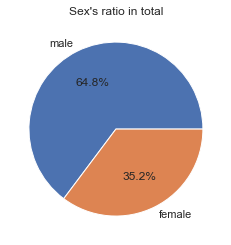

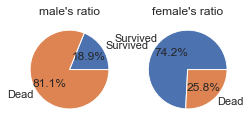

In [24]:
pie_chart('Sex')

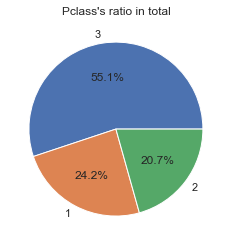

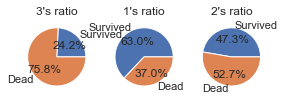

In [25]:
pie_chart('Pclass')

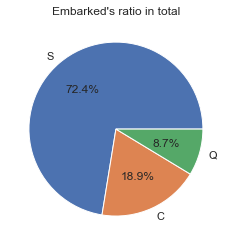

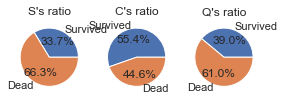

In [26]:
pie_chart('Embarked')

train, test data set 통합하여 다루기

In [27]:
train_and_test = [train, test]

In [28]:
train_and_test[0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [29]:
train_and_test[1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


판다스 정규표현식 (str.extract, str.contains)  
- str.extract
    - dataset.Name.str.extract('([A-Za-z]+)\.')
    - extract 함수 안에 있는 정규식에서는, 중괄호 ([A-Za-z]+)부분이 추출됨
    - 모든 알파벳이 포함된 문자열을 한 번이상 반복하다가 dot(.)으로 마무리하는 문자열  
    => 영어 호칭이 추출됨 (Mr, Mrs, Miss, ...)


- str.contains
    - 지정한 문자열이 포함되어 있는지 확인함
    - 검색 문자열이 포함되어 있는 경우에는 True, 아닌 경우에는 False를 반환함

In [30]:
for dataset in train_and_test:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')

빈도표(Frequency Table)
- crosstab

In [31]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [32]:
for dataset in train_and_test:
    dataset['Title']=dataset['Title'].replace(['Capt','Col','Countess','Dona','Don',
                                             'Dr','Jonkheer','Lady','Major',
                                             'Rev','Sir'],'Other')
    dataset['Title']=dataset['Title'].replace('Mlle','Miss')
    dataset['Title']=dataset['Title'].replace('Mme','Mrs')
    dataset['Title']=dataset['Title'].replace('Ms','Miss')
    
train[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Other,0.347826


In [33]:
for dataset in train_and_test:
    dataset['Title']=dataset['Title'].astype(str)

In [34]:
for dataset in train_and_test:
    dataset['Sex']=dataset['Sex'].astype(str)

In [35]:
train.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [36]:
for dataset in train_and_test:
    dataset['Embarked']=dataset['Embarked'].fillna('S')
    dataset['Embarked']=dataset['Embarked'].astype(str)

In [37]:
for dataset in train_and_test:
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 64), 'Age'] = 4
    dataset['Age'] = dataset['Age'].fillna(0)
    dataset['Age'] = dataset['Age'].astype(int)
    # dataset['Age']=dataset['Age'].map({0:'Child',1:'Young',2:'Middle',3:'Prime',4:'Old'}).astype(str)

In [38]:
print(train[['Pclass','Fare']].groupby(['Pclass'],as_index=False).mean())
print("")
print(test[test["Fare"].isnull()]["Pclass"])

   Pclass       Fare
0       1  84.154687
1       2  20.662183
2       3  13.675550

152    3
Name: Pclass, dtype: int64


In [39]:
for dataset in train_and_test:
    dataset['Fare']=dataset['Fare'].fillna(13.675)

In [40]:
for dataset in train_and_test:
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare']   = 3
    dataset.loc[ dataset['Fare'] > 39.688, 'Fare'] = 4
    dataset['Fare'] = dataset['Fare'].astype(int)

In [41]:
for dataset in train_and_test:
    dataset.loc[dataset['Sex'] == 'male', 'Sex'] = 0
    dataset.loc[dataset['Sex'] == 'female', 'Sex'] = 1

In [42]:
for dataset in train_and_test:
    dataset.loc[dataset['Title'] == 'Master', 'Title'] = 0
    dataset.loc[dataset['Title'] == 'Miss', 'Title'] = 1
    dataset.loc[dataset['Title'] == 'Mr', 'Title'] = 2
    dataset.loc[dataset['Title'] == 'Mrs', 'Title'] = 3
    dataset.loc[dataset['Title'] == 'Other', 'Title'] = 4

In [43]:
for dataset in train_and_test:
    dataset.loc[dataset['Embarked'] == 'S', 'Embarked'] = 0
    dataset.loc[dataset['Embarked'] == 'C', 'Embarked'] = 1
    dataset.loc[dataset['Embarked'] == 'Q', 'Embarked'] = 2

In [44]:
for dataset in train_and_test:
    dataset["Family"] = dataset["Parch"] + dataset["SibSp"]
    dataset['Family'] = dataset['Family'].astype(int)

In [45]:
for dataset in train_and_test:
    dataset['Sex'] = dataset['Sex'].astype('category')
    dataset['Age'] = dataset['Age'].astype('category')
    dataset['Embarked'] = dataset['Embarked'].astype('category')
    dataset['Title'] = dataset['Title'].astype('category')

In [46]:
print(train_and_test[0].head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name Sex Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris   0   1      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   1   2      1      0   
2                             Heikkinen, Miss. Laina   1   1      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   1   2      1      0   
4                           Allen, Mr. William Henry   0   2      0      0   

             Ticket  Fare Cabin Embarked Title  Family  
0         A/5 21171     0   NaN        0     2       1  
1          PC 17599     4   C85        1     3       1  
2  STON/O2. 3101282     1   NaN        0     1       0  
3            113803     4  C123        0     3       1  
4            373450     1   N

In [47]:
print(train_and_test[1].head())

   PassengerId  Pclass                                          Name Sex Age  \
0          892       3                              Kelly, Mr. James   0   2   
1          893       3              Wilkes, Mrs. James (Ellen Needs)   1   2   
2          894       2                     Myles, Mr. Thomas Francis   0   3   
3          895       3                              Wirz, Mr. Albert   0   1   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   1   1   

   SibSp  Parch   Ticket  Fare Cabin Embarked Title  Family  
0      0      0   330911     0   NaN        2     2       0  
1      1      0   363272     0   NaN        0     3       1  
2      0      0   240276     1   NaN        2     2       0  
3      0      0   315154     1   NaN        0     2       0  
4      1      1  3101298     2   NaN        0     3       2  


In [48]:
features_drop=['Name','Ticket','Cabin','SibSp','Parch']

In [49]:
train=train_and_test[0].drop(features_drop,axis=1)

In [50]:
test=train_and_test[1].drop(features_drop,axis=1)

In [51]:
train

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,1,0,3,0,1,0,0,2,1
1,2,1,1,1,2,4,1,3,1
2,3,1,3,1,1,1,0,1,0
3,4,1,1,1,2,4,0,3,1
4,5,0,3,0,2,1,0,2,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,1,2,0,4,0
887,888,1,1,1,1,3,0,1,0
888,889,0,3,1,0,3,0,1,3
889,890,1,1,0,1,3,1,2,0


In [52]:
test

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,892,3,0,2,0,2,2,0
1,893,3,1,2,0,0,3,1
2,894,2,0,3,1,2,2,0
3,895,3,0,1,1,0,2,0
4,896,3,1,1,2,0,3,2
...,...,...,...,...,...,...,...,...
413,1305,3,0,0,1,0,2,0
414,1306,1,1,2,4,1,4,0
415,1307,3,0,2,0,0,2,0
416,1308,3,0,0,1,0,2,0


In [53]:
#train = pd.get_dummies(train)

In [54]:
#test = pd.get_dummies(test)

In [55]:
train_label=train['Survived']

In [56]:
train_label

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [57]:
train_data = train.drop(['PassengerId','Survived'], axis=1)

In [58]:
train_data

,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,3,0,1,0,0,2,1
1,1,1,2,4,1,3,1
2,3,1,1,1,0,1,0
3,1,1,2,4,0,3,1
4,3,0,2,1,0,2,0
...,...,...,...,...,...,...,...
886,2,0,1,2,0,4,0
887,1,1,1,3,0,1,0
888,3,1,0,3,0,1,3
889,1,0,1,3,1,2,0


In [59]:
train_data.dtypes

Pclass         int64
Sex         category
Age         category
Fare           int32
Embarked    category
Title       category
Family         int32
dtype: object

In [60]:
test_data = test.drop('PassengerId', axis=1)

In [61]:
test_data

,Pclass,Sex,Age,Fare,Embarked,Title,Family
0,3,0,2,0,2,2,0
1,3,1,2,0,0,3,1
2,2,0,3,1,2,2,0
3,3,0,1,1,0,2,0
4,3,1,1,2,0,3,2
...,...,...,...,...,...,...,...
413,3,0,0,1,0,2,0
414,1,1,2,4,1,4,0
415,3,0,2,0,0,2,0
416,3,0,0,1,0,2,0


## Prediction by Model

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [63]:
def predict_by_model(model):
    model.fit(train_data, train_label)
    prediction = model.predict(test_data)
    accuracy = round(model.score(train_data,train_label) * 100, 2)
    print("Accuracy:", accuracy, "%")
    return prediction

In [64]:
nb_pred = predict_by_model(GaussianNB())

Accuracy: 78.9 %


In [65]:
rf_pred = predict_by_model(RandomForestClassifier(n_estimators=100))

Accuracy: 89.56 %


In [66]:
lr_pred = predict_by_model(LogisticRegression())

Accuracy: 78.34 %


## Submission

In [67]:
# Final prediction
predictions = rf_pred
predictions_df = pd.DataFrame(predictions)

submission = pd.concat([test['PassengerId'], predictions_df], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('titanic_challenge_dg_1.csv', header=True, index=False)

PermissionError: [Errno 13] Permission denied: 'titanic_challenge_dg_1.csv'